# Analysis of tracking error (object centroid vs image center)

In [106]:
import GravityMachineTrack
import imp
import pandas as pd
import numpy as np
import os
imp.reload(GravityMachineTrack)
import matplotlib.pyplot as plt


%matplotlib notebook

# Track file
# trackFile = 'G:/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Polychaete_4D/Polychaete6/track_mod.csv'
# trackFile = 'G:/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Starfish/StarFish7/track_mod.csv'
# trackFile = 'G:/Hopkins_2018_08_31_MarineSnow/MarSno2/track_cropped.csv'
trackFile = 'G:/HopkinsEmbroyologyCourse_GoodData/BrittleStar/BrittleStar9_Long_Good_Ytracking/track_mod.csv'
# trackFile = 'G:/HopkinsEmbroyologyCourse_GoodData/2018_06_13/Snail/Snail1/track_mod.csv'
# trackFile = 'H:/GravityMachine_Nov2019_Stentor_Euglena_etc/Stentor_18_10_2019/track4/track000.csv'
# trackFile = 'H:/2019 Monterey Trip/GM_v2_Berg_DataBackup/2019_08_15/dino1/track000.csv'
# trackFile = 'H:/2019 Monterey Trip/GM_v2_Berg_DataBackup/2019_08_15/dino10/track000.csv'

# trackFile = 'G:/GravityMachine_Controls_AbioticData/Biotic_ControlExperiments/VolvoxControls_GravityMachine_2018_10_28/Volvox20_phototaxis/track.csv'

Organism, *rest = os.path.split(trackFile)

*rest, Organism = os.path.split(Organism)


track = GravityMachineTrack.gravMachineTrack(trackFile = trackFile, organism = Organism, Tmin = 0, Tmax = 400, 
                                             findDims = True, smoothing_factor =10)
print(Organism)

Path : G:/HopkinsEmbroyologyCourse_GoodData/BrittleStar/BrittleStar9_Long_Good_Ytracking
['Time', 'Xobjet', 'Yobjet', 'Zobjet', 'ThetaWheel', 'ZobjWheel', 'Manual Tracking', 'Image name', 'Focus Measure', 'Liquid Lens Phase', 'Liquid Lens Freq', 'Liquid Lens Ampl', 'Liquid Lens maxGain', 'Y FM maximum', 'LEDPanel color R', 'LEDPanel color G', 'LEDPanel color B']
0
19083
Track duration : 399.99398565292364
Sampling frequency: 47.70571729685338
Smoothing window: 0.20961848110938247
Computed Image height, Image width: 540, 720
0.0031847133757961785
Pixel per mm : 314.0
Color thresholds available! 
 Loading file G:/HopkinsEmbroyologyCourse_GoodData/BrittleStar\colorThresholds.pkl ...
Color thresholds for segmentation: 
 LOW: (0, 0, 95), HIGH : (255, 255, 255)
G:/HopkinsEmbroyologyCourse_GoodData/BrittleStar/BrittleStar9_Long_Good_Ytracking
Loading organism size from memory ...
**************************************************
Organism dimension 0.42620669808357386 mm
Organism Major dimens

In [107]:
Time = track.T
X_pos = track.df['Xobjet']
Y_pos = track.df['Yobjet']
Z_pos = track.df['ZobjWheel']
Z_centroid = track.df['Zobjet']

<IPython.core.display.Javascript object>


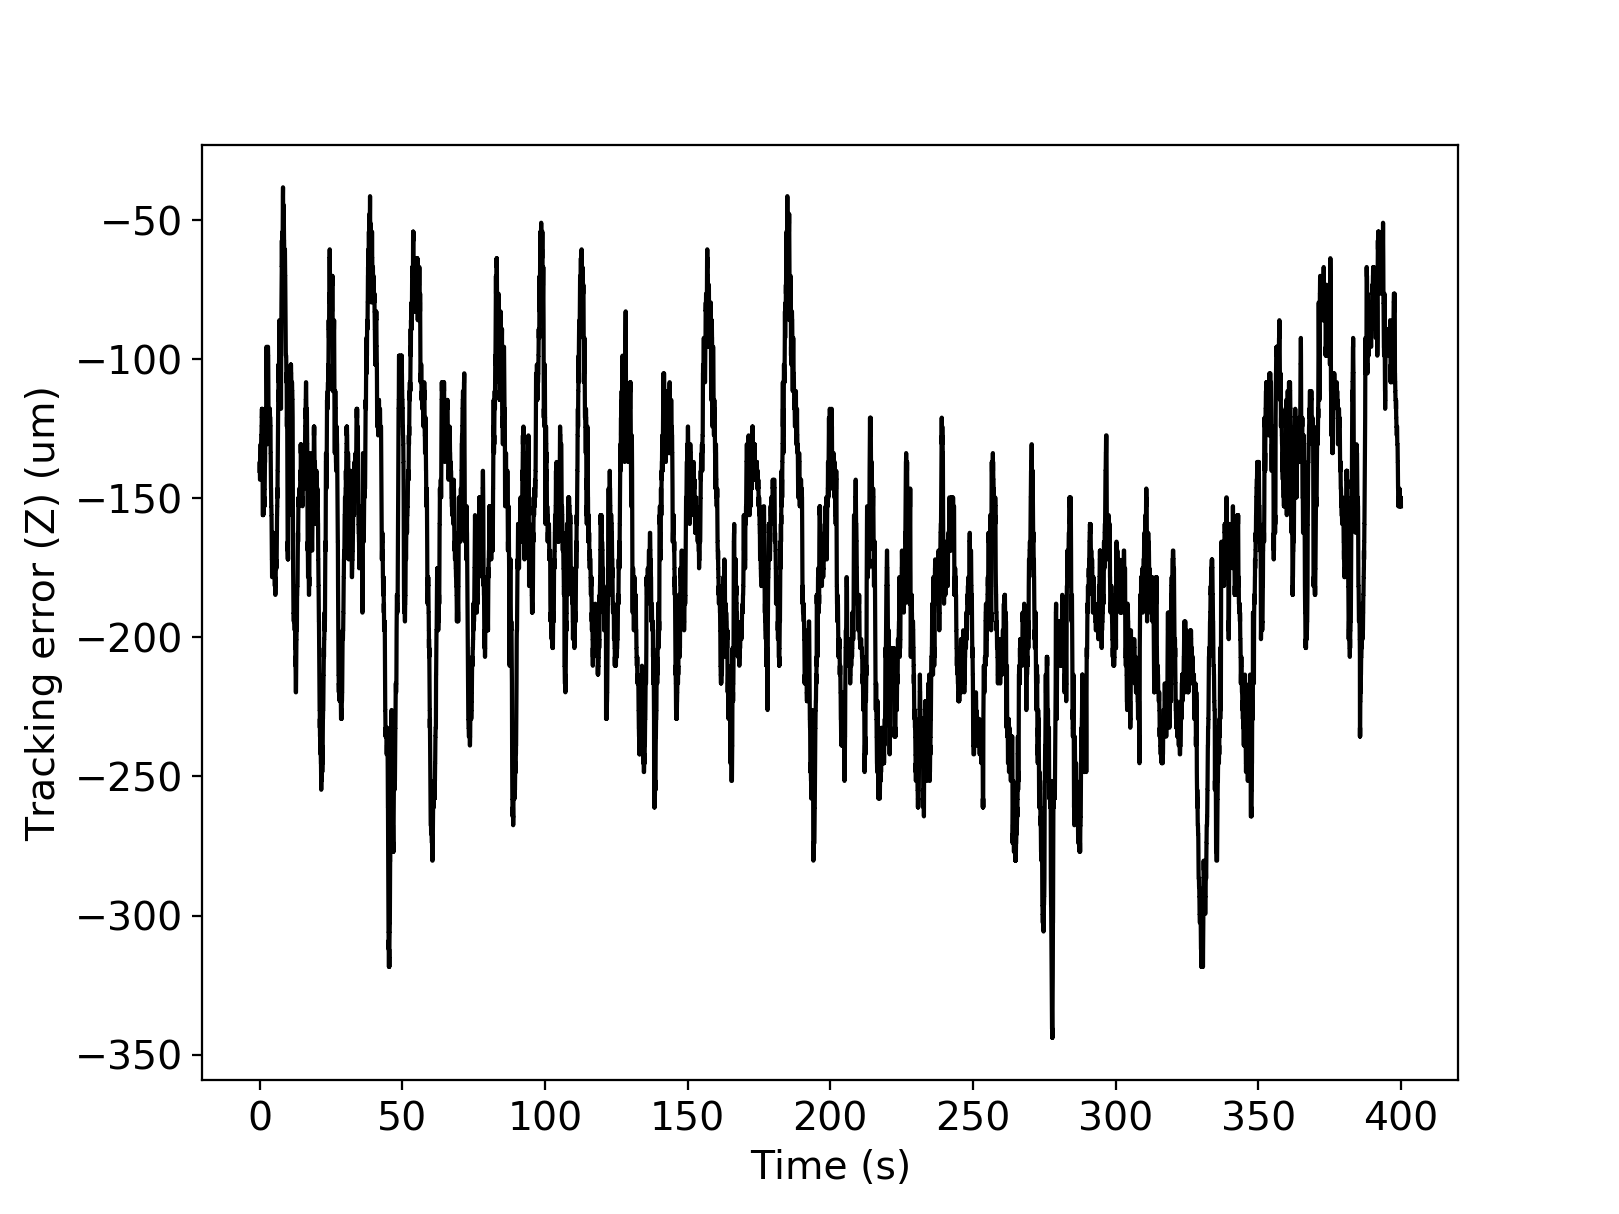

In [108]:
from matplotlib import rcParams
from matplotlib import rc
#rcParams['axes.titlepad'] = 20 
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
### for Palatino and other serif fonts use:
##rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=False)
#plt.rc('font', family='serif')

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})

# Plot the centroid location vs Time
plt.figure(figsize=(8,6))

plt.plot(track.T, 1000*Z_centroid, color = 'k', linestyle = '-')

plt.xlabel('Time (s)')
plt.ylabel('Tracking error (Z) (um)')


plt.savefig('Z_tracking_error_'+Organism+'.png', dpi=300)
plt.savefig('Z_tracking_error_'+Organism+'.svg', dpi=150)

<IPython.core.display.Javascript object>


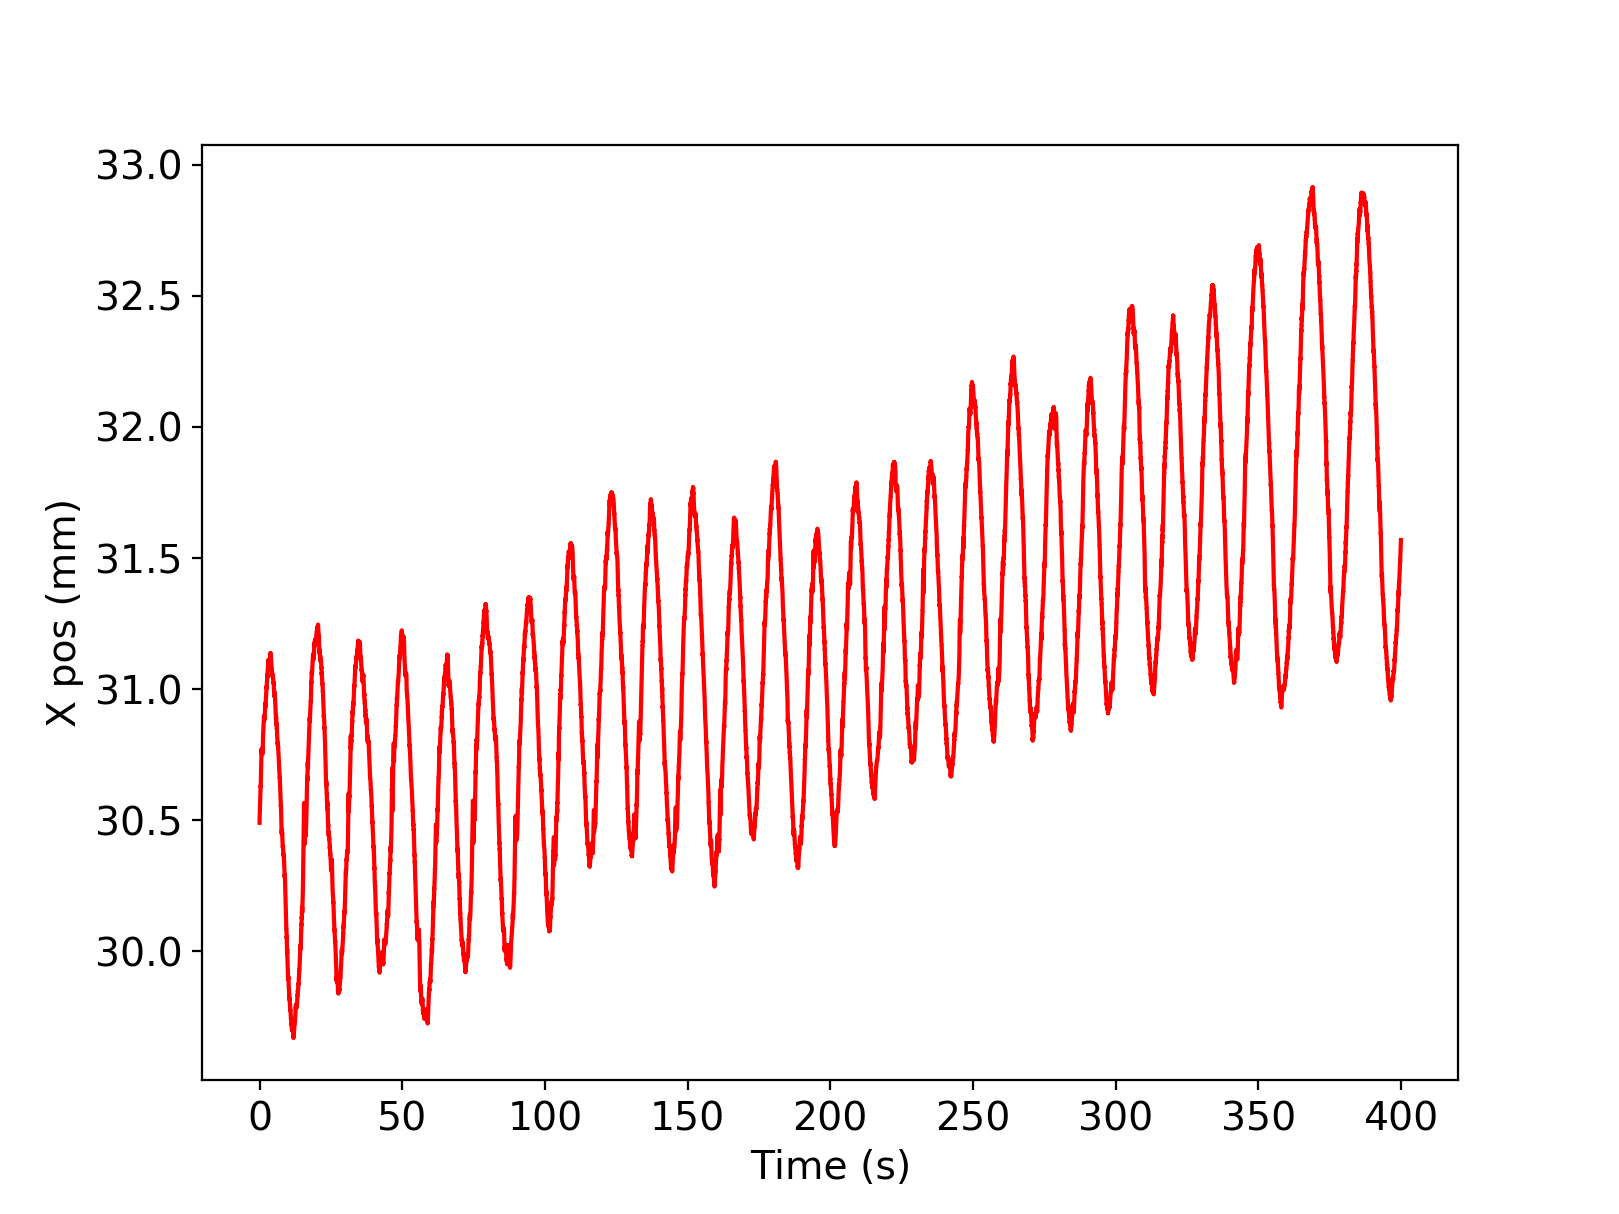

Text(0, 0.5, 'X pos (mm)')

In [109]:
# Plot X_pos vs time
# Plot the centroid location vs Time
plt.figure(figsize=(8,6))

plt.plot(Time, X_pos, color = 'r', linestyle = '-')

plt.xlabel('Time (s)')
plt.ylabel('X pos (mm)')

<IPython.core.display.Javascript object>


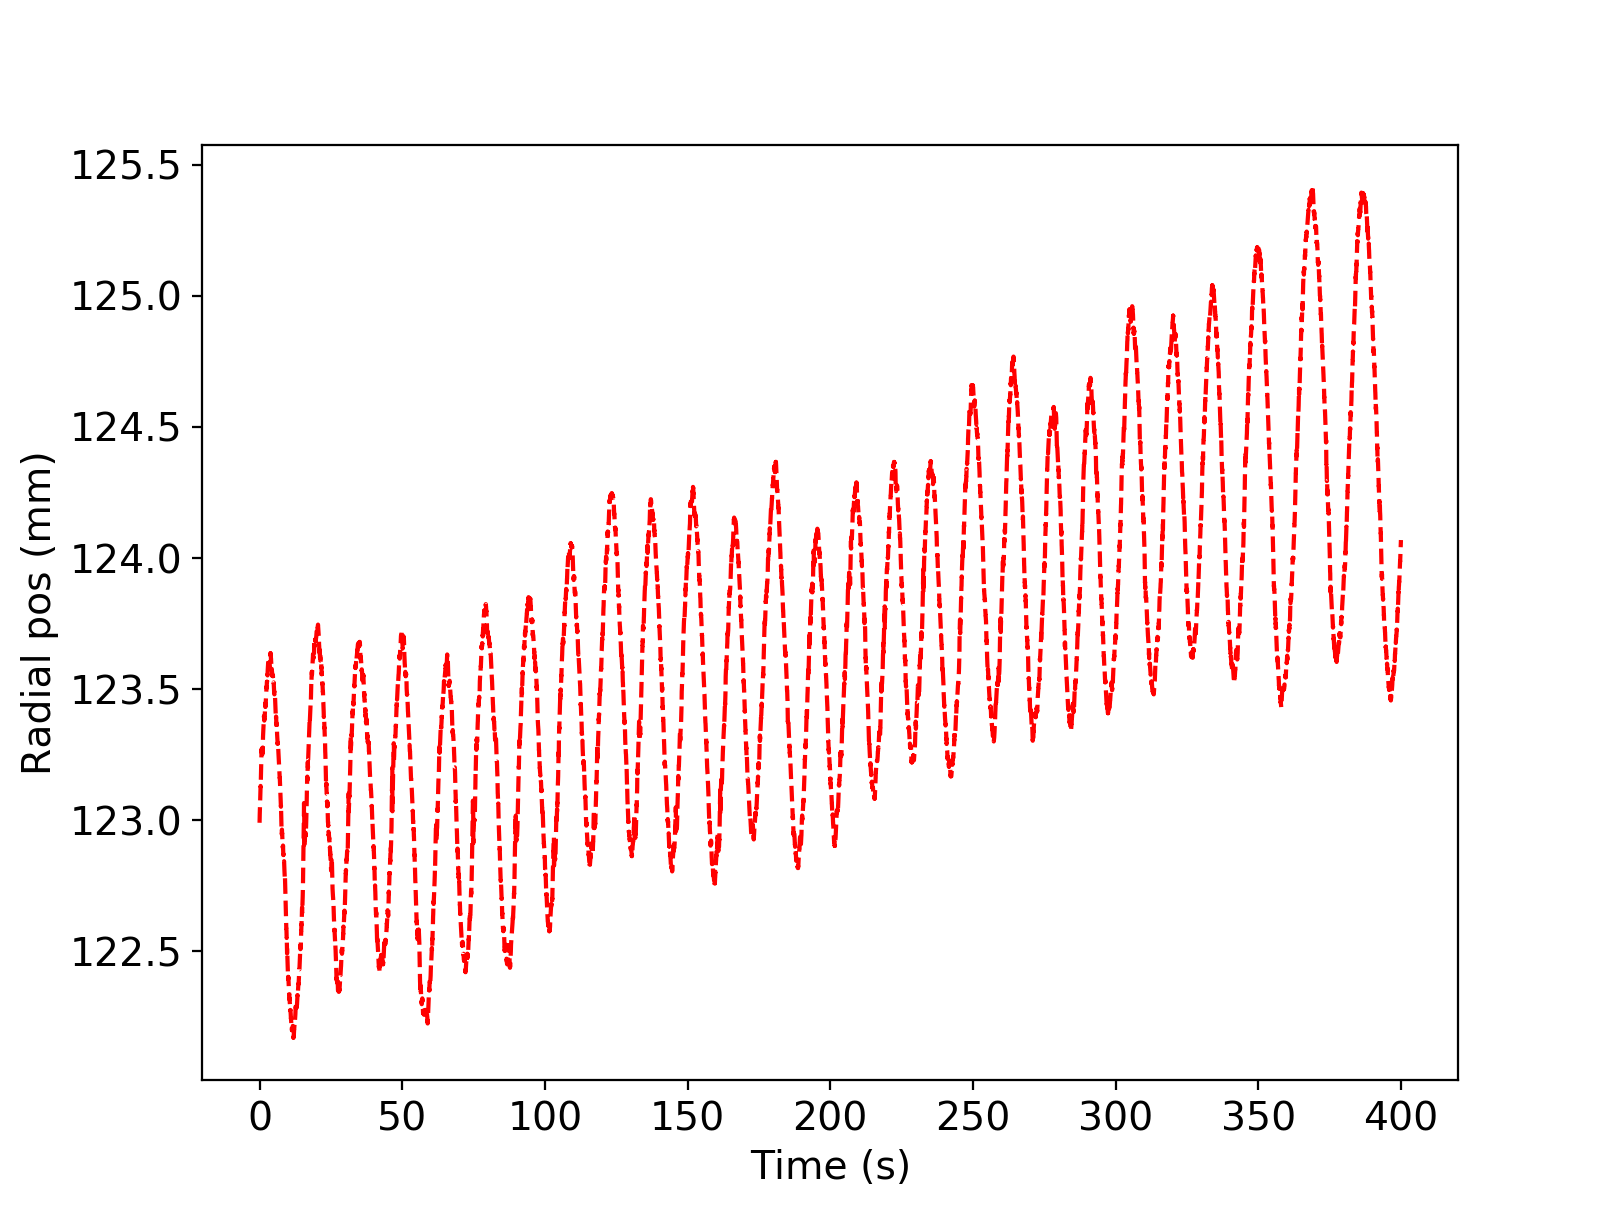

Text(0, 0.5, 'Radial pos (mm)')

In [110]:
# Radial position
R_center = (85 + 100)/2

Radial_pos = R_center + X_pos

plt.figure(figsize=(8,6))

plt.plot(Time, Radial_pos, color = 'r', linestyle = '--')

plt.xlabel('Time (s)')
plt.ylabel('Radial pos (mm)')




<IPython.core.display.Javascript object>


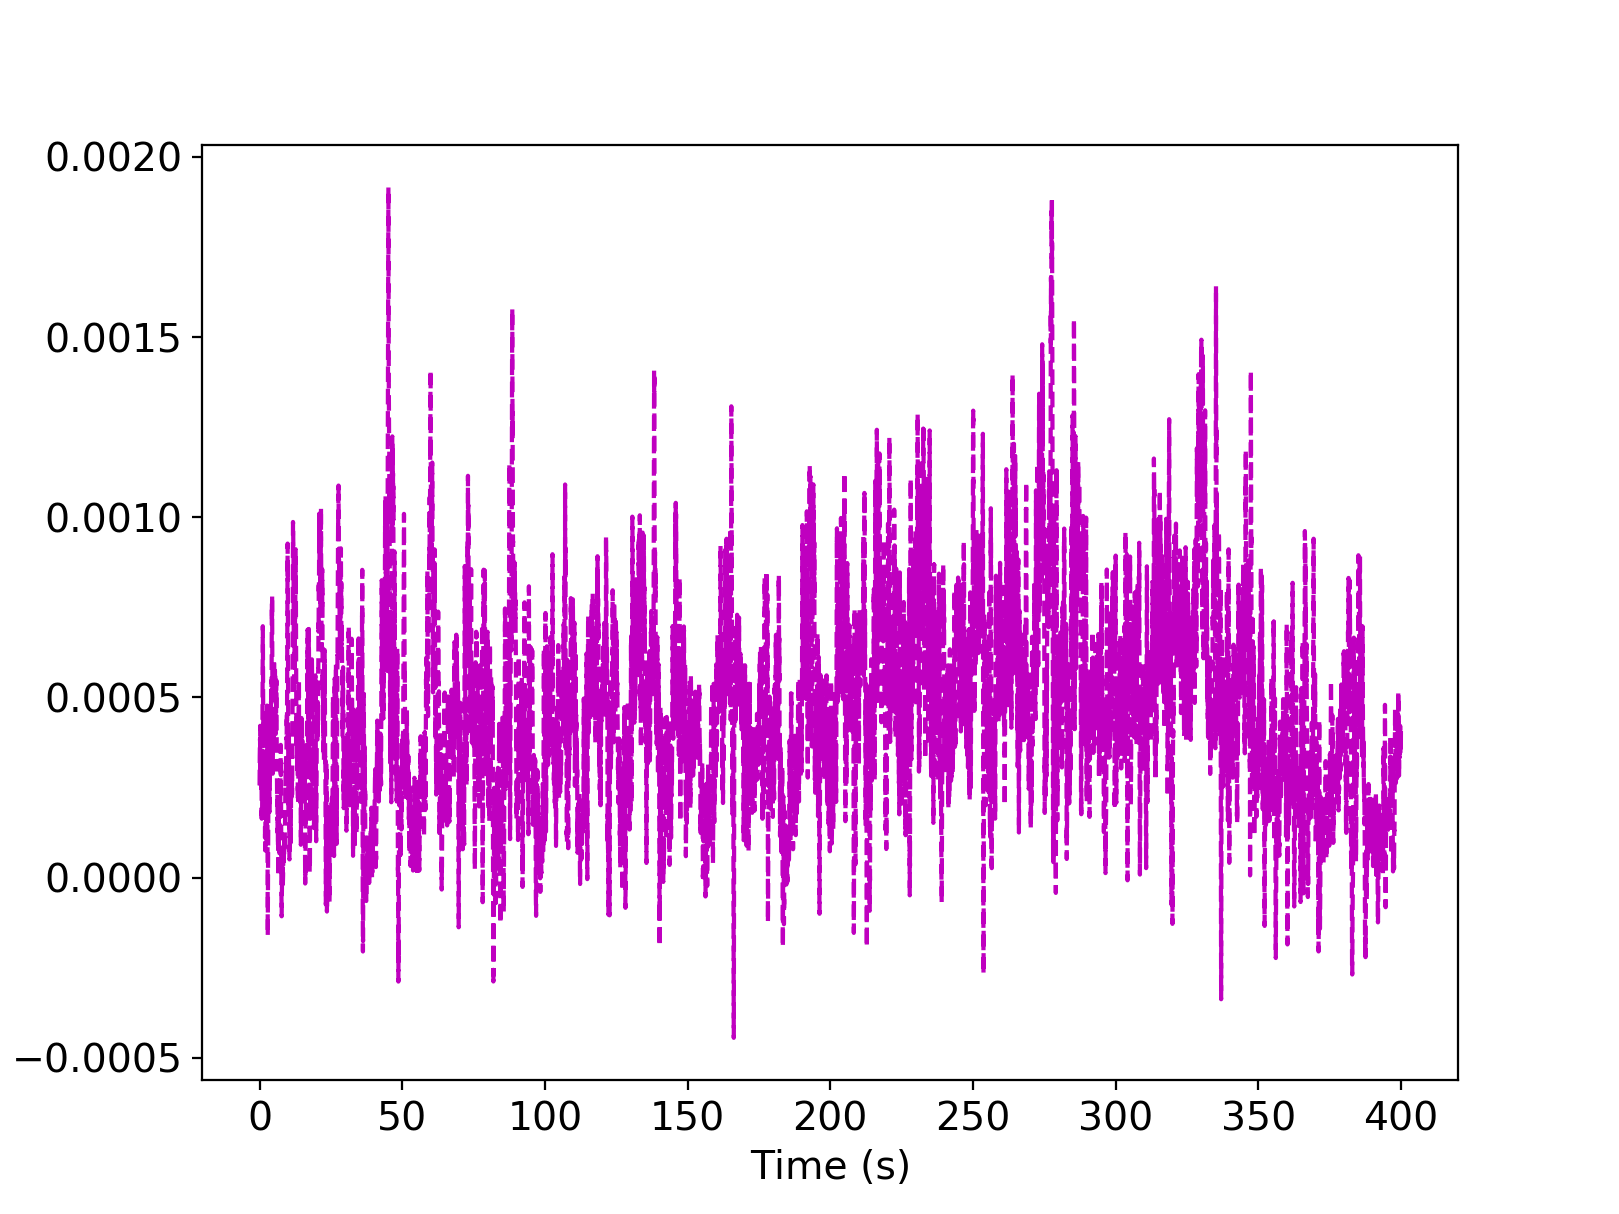

Text(0, 0.5, 'Radial drift velocity (mm/s)')

In [111]:
# Estimate the drift velocity
u_drift = track.Vz_smooth*(Z_centroid/Radial_pos)

# Plot the drift velocity vs time

plt.figure(figsize=(8,6))

plt.plot(Time, u_drift, color = 'm', linestyle = '--')

plt.xlabel('Time (s)')
plt.ylabel('Radial drift velocity (mm/s)')




In [112]:
# Integrate the drift velocity in time to estimate the radial drift.

import scipy

radial_drift_pos = scipy.integrate.cumtrapz(u_drift, x=Time, initial=0)


<IPython.core.display.Javascript object>


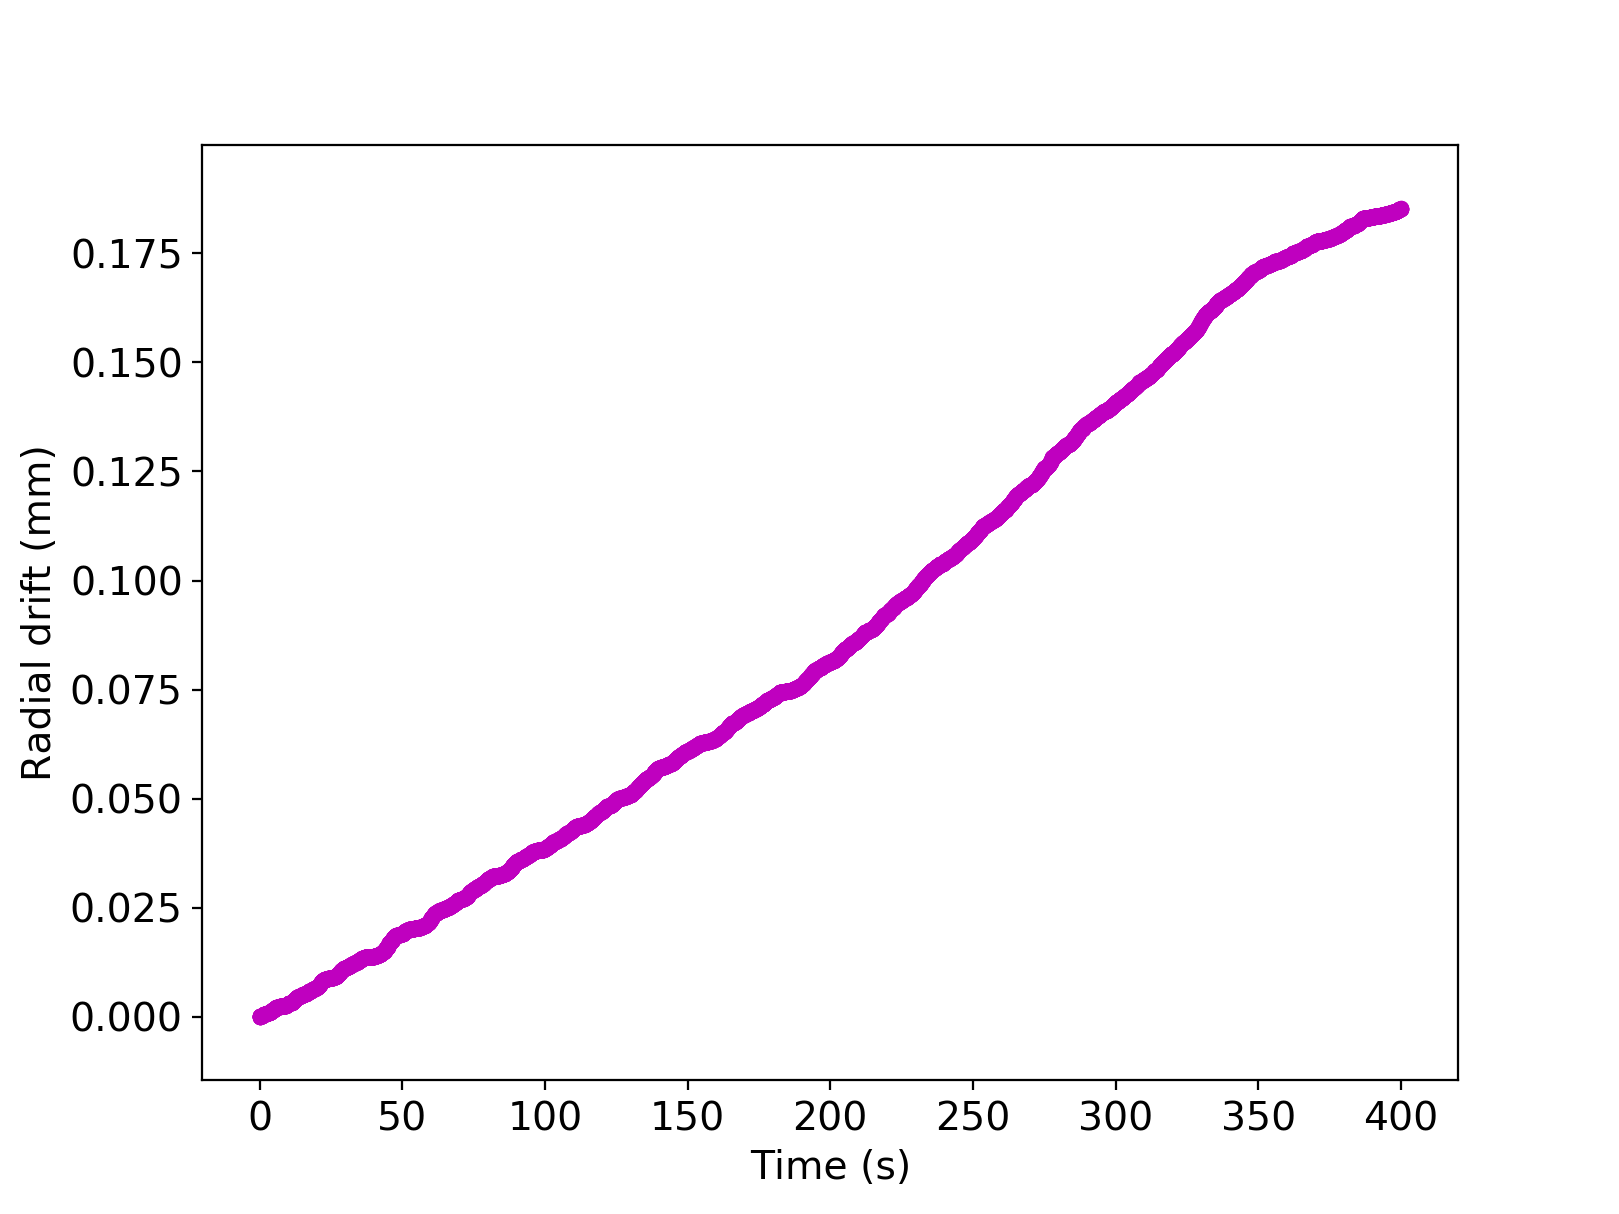

Text(0, 0.5, 'Radial drift (mm)')

In [113]:
# Plot the computed radial drift vs time

plt.figure(figsize=(8,6))

plt.scatter(Time, radial_drift_pos, 20, color = 'm')

plt.xlabel('Time (s)')
plt.ylabel('Radial drift (mm)')


<IPython.core.display.Javascript object>


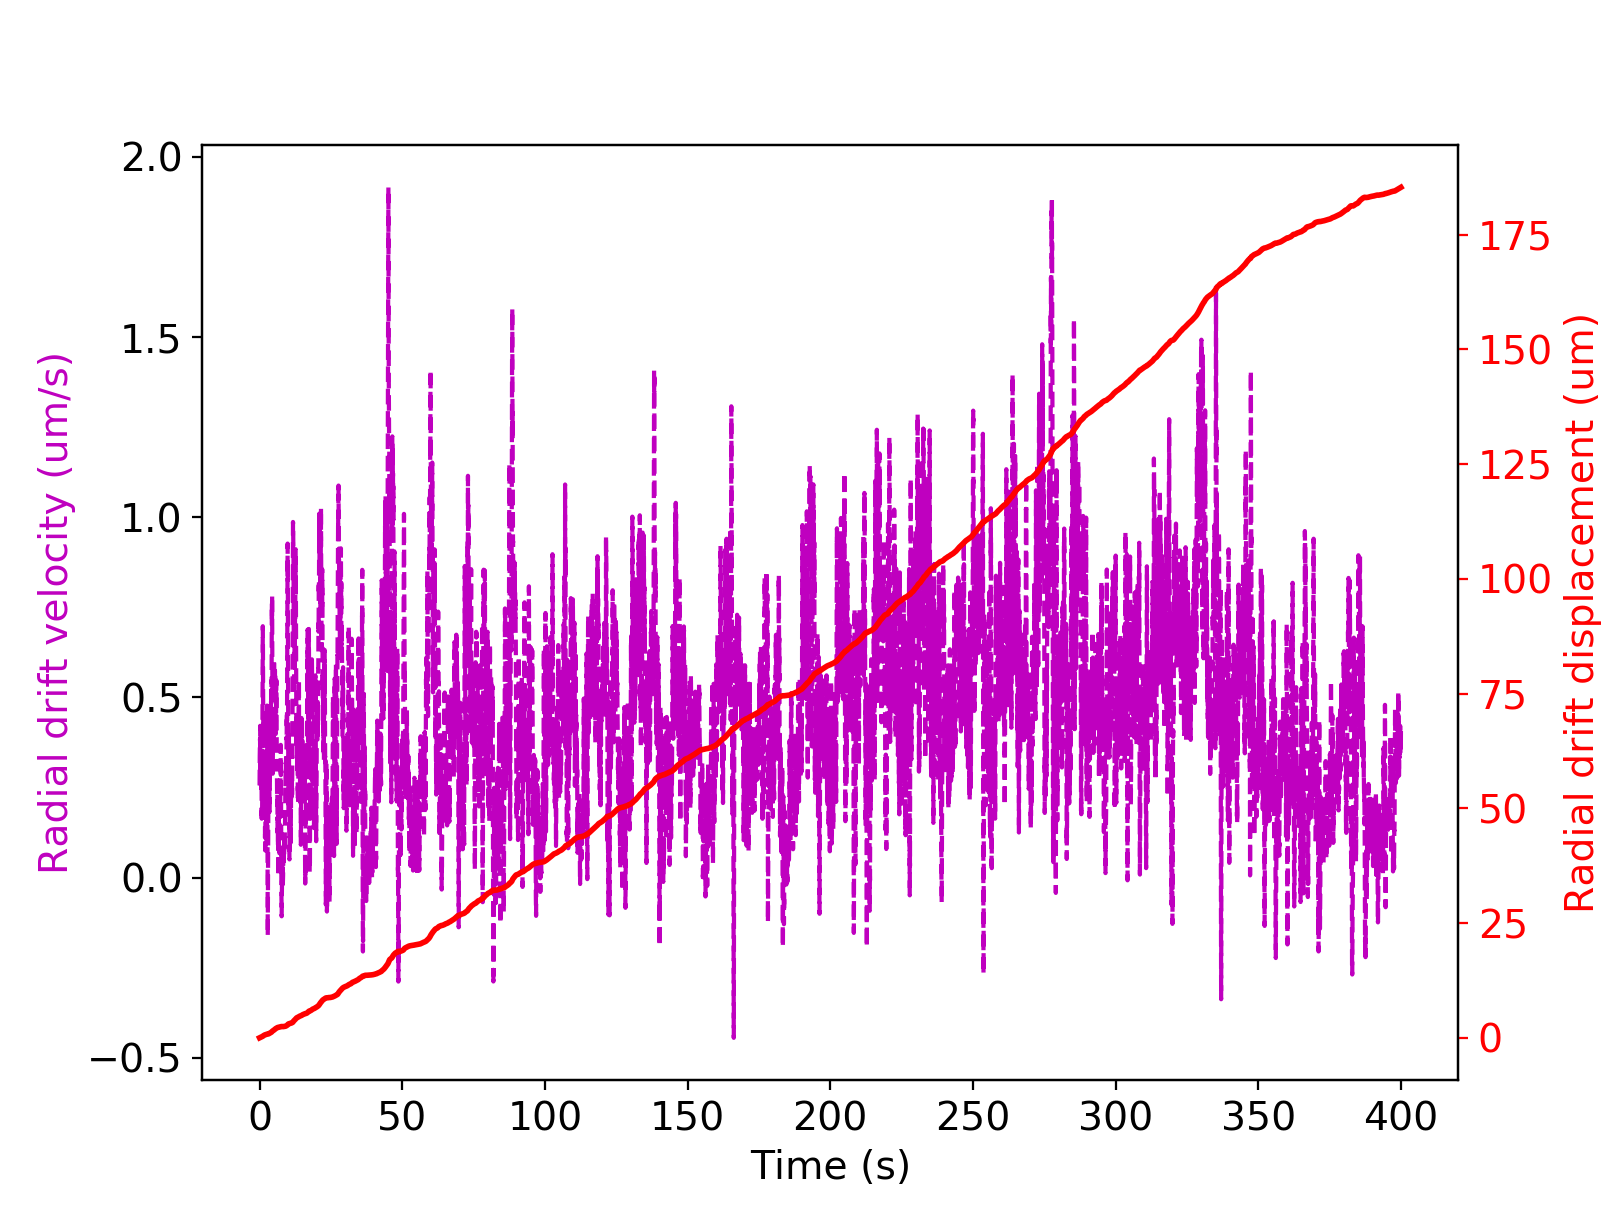

In [114]:
# Plot the drift velocity together with drift displacement on the same plot

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
ax1.plot(Time, 1000*u_drift, color = 'm', linestyle = '--')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Radial drift velocity (um/s)', color = 'm')

ax2.plot(Time, 1000*radial_drift_pos, color = 'r', linestyle = '-', linewidth=2)

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Radial drift displacement (um)', color = 'r')
ax2.tick_params(axis='y', colors='r')

In [115]:
plt.savefig('RadialDriftVelocity_Displacement_'+Organism+'.png', dpi=300)
plt.savefig('RadialDriftVelocity_Displacement_'+Organism+'.svg', dpi=150)